In [1]:
%run 'init.ipynb'
save = get_figsave(5)

## Numeric

In [2]:
C1 = 1/11
C2 = 1/2
L = 1/7
G = 0.7
m0 = -0.5
m1 = -0.8
Bp = 1;

In [3]:
a = m1/G + 1
b = m0/G + 1
alpha = C2/C1
beta = C2/(L*G**2);

In [4]:
def h(x):
    if x > 1:
        return b*x + a - b
    elif x >= -1:
        return a*x
    else:
        return b*x - a + b
    
def f(t, y):
    x, y, z = y[0], y[1], y[2]
    return ((
        alpha * (y - h(x)),
        x - y + z,
        -beta * y
    ))

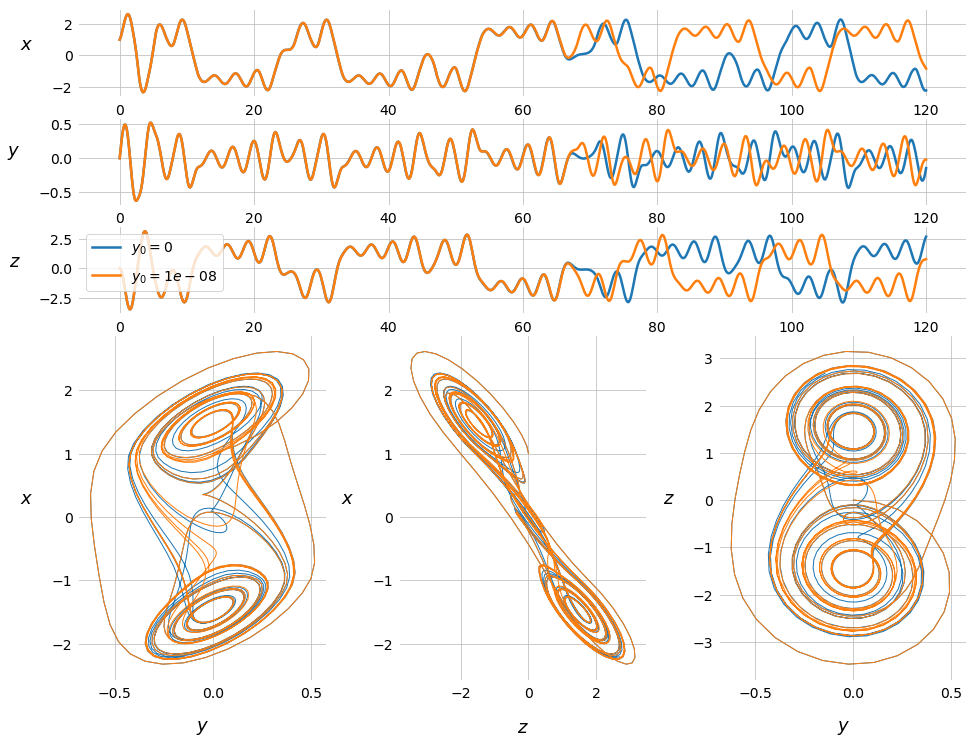

In [10]:
from scipy.integrate import solve_ivp

mpl.style.use({'figure.constrained_layout.use': False})

x0 = 1
y0 = 0
z0 = 0
eps = 0.00000001

t_span = (0, 120)
t_eval = np.linspace(*t_span, 1000)

sol_1 = solve_ivp(f, t_span, (x0, y0, z0), t_eval=t_eval)
sol_2 = solve_ivp(f, t_span, (x0, y0+eps, z0), t_eval=t_eval)

fig = plt.figure(figsize=(14,12))
grid = mpl.gridspec.GridSpec(ncols=3, nrows=4, height_ratios=[1,1,1,4],
                             figure=fig, hspace=0.15, top=0.9, wspace=0.3, left=0.08, right=0.96)
top0 =   fig.add_subplot(grid[0, :])
top1 =   fig.add_subplot(grid[1, :])
top2 =   fig.add_subplot(grid[2, :])
left =  fig.add_subplot(grid[3, 0])
mid =   fig.add_subplot(grid[3, 1])
right = fig.add_subplot(grid[3, 2])

top0.plot(sol_1.t, sol_1.y[0,:], label=f'$y_0 = {y0:g}$')
top0.plot(sol_2.t, sol_2.y[0,:], label=f'$y_0 = {y0+eps:g}$')
top0.set_ylabel('$x$', rotation=0, ha='right')
top1.plot(sol_1.t, sol_1.y[1,:], label=f'$y_0 = {y0:g}$')
top1.plot(sol_2.t, sol_2.y[1,:], label=f'$y_0 = {y0+eps:g}$')
top1.set_ylabel('$y$', rotation=0, ha='right')
top2.plot(sol_1.t, sol_1.y[2,:], label=f'$y_0 = {y0:g}$')
top2.plot(sol_2.t, sol_2.y[2,:], label=f'$y_0 = {y0+eps:g}$')
top2.set_xlabel('Time')
top2.set_ylabel('$z$', rotation=0, ha='right')
top2.legend()

left.plot(sol_1.y[1,:], sol_1.y[0,:], lw=1)
left.plot(sol_2.y[1,:], sol_2.y[0,:], lw=1)
left.set_xlabel('$y$')
left.set_ylabel('$x$', rotation=0, ha='right')

mid.plot(sol_1.y[2,:], sol_1.y[0,:], lw=1)
mid.plot(sol_2.y[2,:], sol_2.y[0,:], lw=1)
mid.set_xlabel('$z$')
mid.set_ylabel('$x$', rotation=0, ha='right')

right.plot(sol_1.y[1,:], sol_1.y[2,:], lw=1)
right.plot(sol_2.y[1,:], sol_2.y[2,:], lw=1)
right.set_xlabel('$y$')
right.set_ylabel('$z$', rotation=0, ha='right')

save(fig, 'chua')

## Symbolic

In [20]:
C1,C2,L,G,m0,m1,Bp,a,b,alpha,beta,x,y,z = sp.symbols('C1,C2,L,G,m0,m1,Bp,a,b,alpha,beta,x,y,z')

In [32]:
C1 = 1/11
C2 = 1/2
L = 1/7
G = 0.7
m0 = -0.5
m1 = -0.8
Bp = 1;

a = m1/G + 1
b = m0/G + 1
alpha = C2/C1
beta = C2/(L*G**2);
    
h = sp.Piecewise(
        (b*x + a - b,  x > 1),
        (b*x - a + b,  x < -1),
        (a*x,          True),
)
    
F = sp.Matrix((
    alpha * (y - h),
    x - y + z,
    -beta * y,
))

J = F.jacobian([x,y,z])

F_np = sp.lambdify((x,y,z), F)
J_np = sp.lambdify((x,y,z), J);

/root/NLS/notebooks/chaos/lyapunov.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  LE[it,i] += log_sv_cumul[i] / t


[0.155 -0.0252 -2.19]


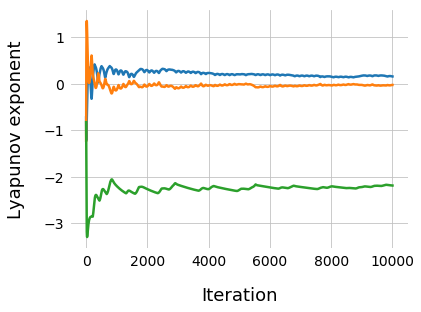

In [49]:
from chaos.lyapunov import lyapunov

def f_full(t, y):
    dydx = np.zeros_like(y)
    dydx[:3] = F_np(y[0], y[1], y[2]).flatten()
    dx = np.reshape(y[3:], (3,3))
    dx_at_jac = J_np(y[0], y[1], y[2]) @ dx
    dydx[3:] = np.reshape(dx_at_jac, 9)
    return dydx

lyapunov(f_full, (x0,y0,z0), 0.01, 10000);

/root/NLS/notebooks/chaos/lyapunov.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  LE[it,i] += log_sv_cumul[i] / t


[0.146 -0.0282 -2.22]


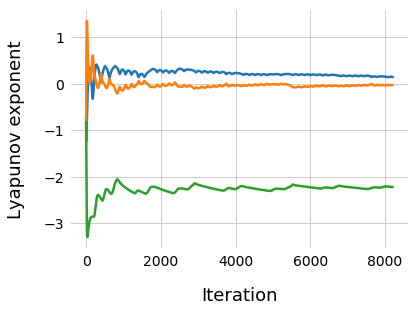

In [54]:
fig, _,_ = lyapunov(f_full, (x0,y0,z0), 0.01, 8200)
save(fig, 'LE_chua_A')

/root/NLS/notebooks/chaos/lyapunov.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  LE[it,i] += log_sv_cumul[i] / t


[0.184 -0.0296 -2.11]


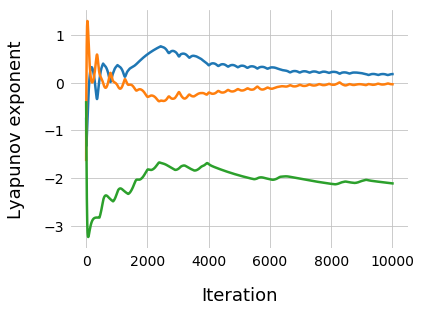

In [55]:
fig, _,_ = lyapunov(f_full, (x0,y0,z0), 0.005, 10000)
save(fig, 'LE_chua_B')

/root/NLS/notebooks/chaos/lyapunov.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  LE[it,i] += log_sv_cumul[i] / t


[0.133 -0.0168 -2.22]


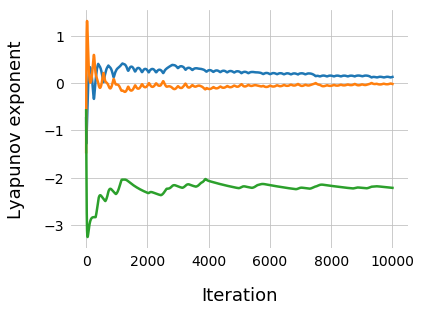

In [52]:
lyapunov(f_full, (x0,y0,z0), 0.007, 10000);

/root/NLS/notebooks/chaos/lyapunov.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  LE[it,i] += log_sv_cumul[i] / t


[0.224 -0.14 -2.17]


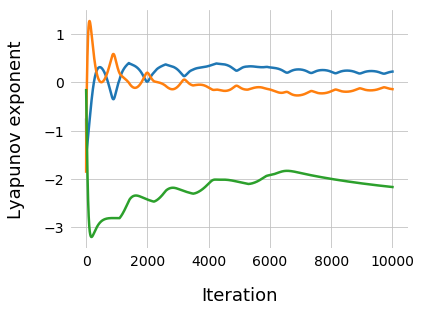

In [53]:
lyapunov(f_full, (x0,y0,z0), 0.002, 10000);